In [1]:
#7_PAH_zf_morphology
import sys
util_path = "/Users/kimd999/Dropbox/script/python/srpAnalytics/analysis/latest/3_qc_BMD/util"
sys.path.insert(0, util_path)

import numpy as np
import pandas as pd
import os, sys, time
from scipy import stats
from matplotlib import pyplot as plt

import generate_dose_response_newest_no_avg as gdr

import BMD_BMDL_estimation as bmdest
import Plot_Save as ps
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/Dropbox/script/python/srpAnalytics/analysis/latest/3_qc_BMD/7_PAH_zf_morphology


In [3]:
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/7_PAH_zf_morphology/input/wide/7_PAH_zf_morphology_data_2020NOV11_wide_DNC_0.csv'

morphological_data = pd.read_csv(complete_file_path, header = 0)
pd.set_option('display.max_columns', None)
display(morphological_data.head())
display(morphological_data.columns)
display(np.unique(morphological_data.well))

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRN_,CRAN,DNC_,DP24,EDEM,LTRK,MO24,MORT,MUSC,NC__,SKIN,SM24,TCHR
0,3756,20544,A01,3756_20544_A01,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,3756,20544,A02,3756_20544_A02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3756,20544,A03,3756_20544_A03,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3756,20544,A04,3756_20544_A04,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3756,20544,A05,3756_20544_A05,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Index(['chemical.id', 'plate.id', 'well', 'chemical_plate_well', 'conc',
       'AXIS', 'BRN_', 'CRAN', 'DNC_', 'DP24', 'EDEM', 'LTRK', 'MO24', 'MORT',
       'MUSC', 'NC__', 'SKIN', 'SM24', 'TCHR'],
      dtype='object')

array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09',
       'A10', 'A11', 'A12', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06',
       'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'C01', 'C02', 'C03',
       'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12',
       'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09',
       'D10', 'D11', 'D12', 'E01', 'E02', 'E03', 'E04', 'E05', 'E06',
       'E07', 'E08', 'E09', 'E10', 'E11', 'E12', 'F01', 'F02', 'F03',
       'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12',
       'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09',
       'G10', 'G11', 'G12', 'H01', 'H02', 'H03', 'H04', 'H05', 'H06',
       'H07', 'H08', 'H09', 'H10', 'H11', 'H12'], dtype=object)

In [4]:
#np.sum(morphological_data['MO24'] == 1)

In [5]:
test_data_sim = 0
if(test_data_sim == 0):
    # Add aggregate endpoints
    # 1. Any effect at 24hrs (combination of MO24, DP24 and SM24) >> 'ANY24'
    morphological_data['ANY24'] = morphological_data[['MO24','DP24','SM24']].sum(axis=1,skipna=True,min_count=1)
    
    # 2. Any effect within 5 days (combination of all measurements at both time points)
    morphological_data['ANY120'] = morphological_data[['AXIS', 'BRN_', 'CRAN', 'EDEM', 'LTRK', 'MORT', 'MUSC', 'NC__', 'SKIN', 'TCHR', 'ANY24']].sum(axis=1,skipna=True,min_count=1)
    
    # 3. Total mortality (MO24 + MORT) >> 'TOT_MORT'
    morphological_data['TOT_MORT'] = morphological_data[['MO24','MORT']].sum(axis=1,skipna=True,min_count=1)

    # 4. Any effect except mortality (#2 minus MO24 and MORT) >> 'ALL_BUT_MORT'
    morphological_data['ALL_BUT_MORT'] = morphological_data[['AXIS', 'BRN_', 'CRAN', 'DP24', 'EDEM', \
                                                             'LTRK', 'MUSC', 'NC__', 'SKIN', 'SM24', 'TCHR']].sum(axis=1,skipna=True,min_count=1)


In [6]:
# morphological_data_end_point_chemical_id = morphological_data.loc[morphological_data['chemical.id'] == chemical_id,['chemical.id', 'conc', 'plate.id', 'well', end_point]]
morphological_data_end_point_chemical_id = morphological_data.loc[morphological_data['chemical.id'] == 1532,['chemical.id', 'conc', 'plate.id', 'well', 'ANY24']]
display(morphological_data_end_point_chemical_id)
#display(morphological_data.loc[morphological_data[]'chemical.id']==1532)
#print ("done")

,chemical.id,conc,plate.id,well,ANY24


In [7]:
display(morphological_data.head())

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRN_,CRAN,DNC_,DP24,EDEM,LTRK,MO24,MORT,MUSC,NC__,SKIN,SM24,TCHR,ANY24,ANY120,TOT_MORT,ALL_BUT_MORT
0,3756,20544,A01,3756_20544_A01,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN
1,3756,20544,A02,3756_20544_A02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3756,20544,A03,3756_20544_A03,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN
3,3756,20544,A04,3756_20544_A04,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3756,20544,A05,3756_20544_A05,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
if (os.path.isdir("output") == False):
    os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)
    
if (os.path.isdir("report") == False):
    os.mkdir("report")
    
morphological_data_filename = os.path.join("report", 'morphological_data.csv')
morphological_data_file_out = open(morphological_data_filename, "w")
morphological_data.to_csv(morphological_data_filename, index=False)
morphological_data_file_out.close()

In [9]:
# Specify end_point and chemical of interest
# Perform a check of the existence of "essential" column labels

start_time = time.time()

qc_flag_filename = os.path.join("report", 'qc_flag.csv')
qc_flag_file_out = open(qc_flag_filename, "w")

write_this = "qc_flag\n"
qc_flag_file_out.write(write_this)

erased_morphological_data_end_point_chemical_id_filename = os.path.join("report", 'erased_morphological_data_end_point_chemical_id.csv')
erased_morphological_data_end_point_chemical_id_file = open(erased_morphological_data_end_point_chemical_id_filename, "w")
write_this="chemical_id,plate_id,end_point\n"
erased_morphological_data_end_point_chemical_id_file.write(write_this)
erased_morphological_data_end_point_chemical_id_file.close()


erased_morphological_data_end_point_chemical_id_filename_0p25_erased = erased_morphological_data_end_point_chemical_id_filename[:-4] + '_0p25_erased.csv'
erased_morphological_data_end_point_chemical_id_file_0p25_erased = open(erased_morphological_data_end_point_chemical_id_filename_0p25_erased, "w")
write_this="chemical_id,end_point,dose\n"
erased_morphological_data_end_point_chemical_id_file_0p25_erased.write(write_this)
erased_morphological_data_end_point_chemical_id_file_0p25_erased.close()


erased_morphological_data_end_point_chemical_id_filename_0p25_kept = erased_morphological_data_end_point_chemical_id_filename[:-4] + '_0p25_kept.csv'
erased_morphological_data_end_point_chemical_id_file_0p25_kept = open(erased_morphological_data_end_point_chemical_id_filename_0p25_kept, "w")
write_this="chemical_id,end_point,dose\n"
erased_morphological_data_end_point_chemical_id_file_0p25_kept.write(write_this)
erased_morphological_data_end_point_chemical_id_file_0p25_kept.close()

# full -> 17 (without DNC) unlike phase_I_II (18 endpoints), 7_PAH lacks NC24
end_points = ['ANY24','ANY120','AXIS','ALL_BUT_MORT','BRN_','CRAN','DP24','EDEM','LTRK','MO24','MORT','MUSC','NC__', 'SKIN','SM24','TCHR','TOT_MORT']
#end_points = ['CRAN']

# all chemicals
for chemical_id in np.unique(morphological_data['chemical.id']):
    
#for chemical_id in [66]:
    print("chemical_id:" + str(chemical_id))

    for end_point in end_points:
        os.chdir(output_folder)
        # subset original dataframe for a user-specified chemical and end_point pair
        morphological_data_end_point_chemical_id = morphological_data.loc[morphological_data['chemical.id'] == chemical_id,['chemical.id', 'conc', 'plate.id', 'well', end_point]]
        
        # Binarize end-point hits (Values > 1 are forced to 1)
        end_point_hits = morphological_data_end_point_chemical_id[end_point]
        end_point_hits.loc[end_point_hits > 0] = 1
        
        #print (str(morphological_data_end_point_chemical_id))
   #     morphological_data_end_point_chemical_id.to_csv('morpho.csv', index=False)

#        f_end_point = open('end_point.txt', 'w')
 #       f_end_point.write(str(end_point))
  #      f_end_point.close()
                  
        dose_response = gdr.gen_dose_response(morphological_data_end_point_chemical_id, end_point, \
                                              erased_morphological_data_end_point_chemical_id_filename)
        
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
    #    qc_flag = gdr.BMD_feasibility_analysis_qc_1(dose_response)
        qc_flag_file_out.write(str(qc_flag)+"\n")
        
        test_dose_response = gdr.reformat_dose_response(dose_response)
        
#        write_this = str(chemical_id) + "," + str(end_point) + "," + str(len(test_dose_response)) + "\n"
 #       print ("write_this:"+str(write_this))
  #      f_out.write(write_this)
    
        qc_flag_folder = "qc_" + str(qc_flag)
        if (os.path.isdir(str(qc_flag_folder)) == False):
            os.mkdir(str(qc_flag_folder))
        os.chdir(str(qc_flag_folder))

        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                print(test_dose_response.dose[-1:])
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
#test_dose_f_out.close()
#f_out.close()
qc_flag_file_out.close()
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) 
# for all combinations of 342 chemicals and 18 endpoints, 4 minutes took for qc only
# for all combinations of 342 chemicals and 18 endpoints, 104~165 minutes took for qc and bmd report

f_time = open('running_time.txt', 'w')
f_time.write(str(time_took))
f_time.close()

chemical_id:3756
data_ep_cid:
     chemical.id   conc  plate.id well  ANY24
0           3756  100.0     20544  A01    1.0
1           3756  100.0     20544  A02    0.0
2           3756  100.0     20544  A03    1.0
3           3756  100.0     20544  A04    0.0
4           3756  100.0     20544  A05    0.0
..           ...    ...       ...  ...    ...
282         3756    0.0     20625  H08    0.0
283         3756    0.0     20625  H09    0.0
284         3756    0.0     20625  H10    0.0
285         3756    0.0     20625  H11    0.0
286         3756    0.0     20625  H12    0.0

[287 rows x 5 columns]
data_ep_cid:
     chemical.id   conc  plate.id well  ANY24
0           3756  100.0     20544  A01    1.0
1           3756  100.0     20544  A02    0.0
2           3756  100.0     20544  A03    1.0
3           3756  100.0     20544  A04    0.0
4           3756  100.0     20544  A05    0.0
..           ...    ...       ...  ...    ...
282         3756    0.0     20625  H08    0.0
283         3

In [10]:
#print (morphological_data_end_point_chemical_id)
np.asarray(morphological_data_end_point_chemical_id['plate.id'])

array([20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488,
       20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488,
       20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488,
       20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488,
       20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488,
       20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488,
       20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488,
       20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488,
       20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488,
       20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488, 20488,
       20488, 20488, 20488, 20488, 20488, 20489, 20489, 20489, 20489,
       20489, 20489, 20489, 20489, 20489, 20489, 20489, 20489, 20489,
       20489, 20489, 20489, 20489, 20489, 20489, 20489, 20489, 20489,
       20489, 20489, 20489, 20489, 20489, 20489, 20489, 20489, 20489,
       20489, 20489,

In [11]:
#[np.unique(morphological_data_end_point_chemical_id['chemical.id'].values()),1]

qc_flag_filename:report/qc_flag.csv


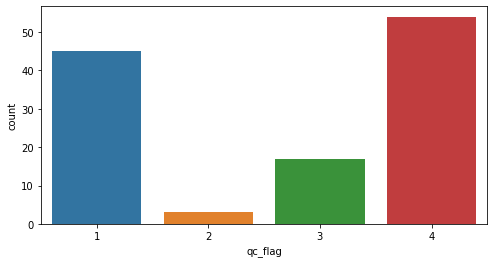

In [12]:
os.chdir(output_folder)

qc_flag_filename = os.path.join("report", 'qc_flag.csv')
print ("qc_flag_filename:"+str(qc_flag_filename))
qc_flag_data = pd.read_csv(qc_flag_filename, index_col=None)
#display(qc_flag_data.head())
ds = pd.Series({"Column": qc_flag_data["qc_flag"]})
plt.figure(figsize=(8,4))
sns.countplot(x="Column", data=ds)
plt.show()

In [13]:
'''os.chdir(starting_dir)

sns.set_theme(style="whitegrid")
print ("array_filename:"+str(array_filename))
array_report_data = pd.read_csv(array_filename, index_col=None)
display(array_report_data.head())
#ax = sns.barplot(x="end_point", y="len_test_dose_response", data=array_report_data)

ds = pd.Series({"Column": array_report_data["len_test_dose_response"]})
plt.figure(figsize=(8,4))
plt.xlabel("leng")
sns.countplot(x="Column", data=ds)
plt.show()
print ("done")'''

'os.chdir(starting_dir)\n\nsns.set_theme(style="whitegrid")\nprint ("array_filename:"+str(array_filename))\narray_report_data = pd.read_csv(array_filename, index_col=None)\ndisplay(array_report_data.head())\n#ax = sns.barplot(x="end_point", y="len_test_dose_response", data=array_report_data)\n\nds = pd.Series({"Column": array_report_data["len_test_dose_response"]})\nplt.figure(figsize=(8,4))\nplt.xlabel("leng")\nsns.countplot(x="Column", data=ds)\nplt.show()\nprint ("done")'

In [14]:
test_dose_response.dose

0      0.00
1      1.00
2      2.54
3      6.45
4     16.40
5     35.00
6     74.80
7    100.00
Name: dose, dtype: float64

In [15]:
#test_dose_response.dose.iloc[0]+test_dose_response.dose.iloc[1]

In [16]:
dose_response['num_affect']/dose_response['num_embryos']

0    0.032258
1    0.147059
2    0.027778
3    0.000000
4    0.138889
5    0.114286
6    0.583333
7    0.457143
dtype: float64